# Apriori  

It uses a simple but famous principle: “If an itemset is frequent, then all of its subsets must also be frequent”. Conversely, “if an itemset is infrequent, then all its subsets must be infrequent too”. It has a slightly more efficient approach to association detection than other known methods and it is fast to train for big datasets. Another advantage is that consequents can be selected in advance.  
  
APRIORI complexity is affected by database volume, average transaction width and dimensionality of data set (number of existing items). However, APRIORI is recommended if:  
- You wish to focus on only certain consequents or antecedents (Apriori can provide more control).
- You want to create rules for false values (negative rules).
- You have datasets with numeric fields (Apriori can handle numeric fields as antecedents in rules)
- You want to have more control over the method of rule selection (Apriori gives you more options in the advanced selection setting)
- You want to focus on the frequency of the antecedents (not only on rule support)  

Finding a rule is about “discovering” a set of events that are usually presented in the form:  
  
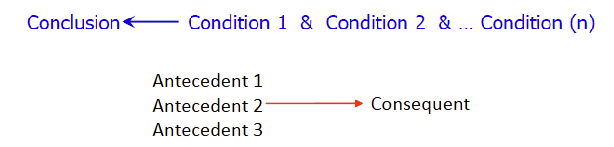  
  
Where, as said before, the “conditions” are known as the antecedents of the rule, and the “conclusion” is known as the consequent.  
  
Market Basket analysis can be understood as a tool to CLUSTER customers into similar groups according to the different rule/s they tend to follow or to CLUSTER products that are bought together, but we should say that the connection with Cluster analysis is somewhat incidental.  
  
- Instances (#): is the number of records in the dataset that match the antecedents.
- Support (%): the percentage of records that match the antecedents. A rule with low support is likely to be uninteresting from a business perspective because it may not be profitable to promote items that customers seldom buy.  
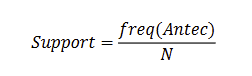  
- Confidence (%): is the percentage of records matching the antecedents that also match the consequent. Confidence measures the consistency of the interpretation made by a rule. For a given rule, the higher the confidence, the more likely it is for the consequent to be present in transactions that contain antecedents (a kind of an estimate of the conditional probability of a consequent given a set of antecedents)  
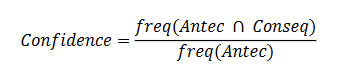  
- Rule Support (%): percentage of TOTAL records that match the entire rule, both the antecedents and consequent. Support is obviously an important measure because a low value may occur simply by chance.  
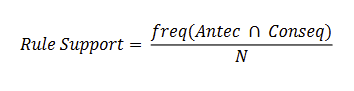  

---

Scenario:  
You are analyzing transaction data to uncover frequent itemsets and generate association rules.

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Step 1: Create a dataset of transactions
transactions = pd.DataFrame([
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Bread', 'Butter', 'Jam'],
    ['Milk', 'Butter'],
    ['Milk', 'Bread', 'Butter', 'Jam']
], columns=['Item1', 'Item2', 'Item3', 'Item4'])

transactions

,Item1,Item2,Item3,Item4
0,Milk,Bread,Butter,None
1,Milk,Bread,None,None
2,Bread,Butter,Jam,None
3,Milk,Butter,None,None
4,Milk,Bread,Butter,Jam


In [5]:
# Convert dataset to one-hot encoded format
one_hot = pd.get_dummies(transactions.apply(pd.Series).stack()).groupby(level=0).sum()
one_hot

,Bread,Butter,Jam,Milk
0,1,1,0,1
1,1,0,0,1
2,1,1,1,0
3,0,1,0,1
4,1,1,1,1


In [6]:
# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(one_hot, min_support = 0.5, use_colnames = True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
   support         itemsets
0      0.8          (Bread)
1      0.8         (Butter)
2      0.8           (Milk)
3      0.6  (Butter, Bread)
4      0.6    (Bread, Milk)
5      0.6   (Butter, Milk)


c:\Users\SABIO\Documents\GitHub\Personal-Projects\myenv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


To circumvent some of the previous limitations pf using minimum confidence and confidence support as rule selection, other measures have been used commonly for rule selection. For better understanding, we will use two basic definitions:
- Prior confidence: the relative frequency of the Consequent
- Posterior confidence: Confidence of a rule with one or more Antecedents
- Lift: The ratio of the posterior confidence to the prior confidence (the ratio of the rule’s confidence to the overall consequent’s support). If both items were independent, numerator and denominator would equal, therefore Lift would be one. The higher the vale, the greater the theoretical association between both.  
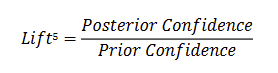  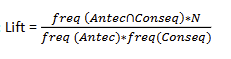  
- Confidence difference: based on the absolute difference between the posterior and prior confidence (also called leverage). This measure gives extra input on selecting or discarding some rules:
    - Allows selecting negative rules, as the absolute value of the difference is being used. A Negative rule is one in which the Consequent occurs less often when conditions are added.
    - Allows discarding obvious rules. So, a rule usually true will only be selected if its prior confidence is low  
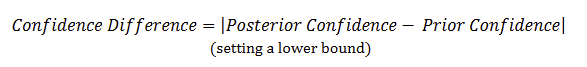  
- Confidence ratio: Another simple way to compare Prior and Posterior confidences is to compute their ratio (min between max) and subtract it from 1. 
    - Since this method uses a ratio, unlike the Confidence Difference measure, it is more sensitive to ratios in the lower confidence regions. The ratio between 30% (prior) and 40% (posterior) is greater than that between 70% (prior) and 80%(posterior), even though the absolute difference is identical.
    - This option can find rarities and negative effects, and it can be more finely tuned than the confidence difference. It will find both positive and negative rules across a range of prior confidences. So, if the Prior Confidence is low, then only a small change in the Posterior Confidence is required to select a rule, even for negative values.  
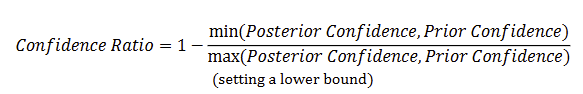  

---

In [8]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.7)
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Butter),(Bread),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
1,(Bread),(Butter),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
2,(Bread),(Milk),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
3,(Milk),(Bread),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
4,(Butter),(Milk),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
5,(Milk),(Butter),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
